# Prac 07
In this prac we will look at a few examples of outlier analysis.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# Q1 Extreme Value Analysis

1. Load the breast cancer data set.
1. Select the 'mean area' attribute and:
  - Compute the mean and standard deviation
  - Compute he z-score for each item
  - Identify extreme values as those with |z|>3
  - count and list the outlier values.
  - Plot a historgram of this attribute

## Load data

The breast cancer data set is bundled with skelarn.
You can access it via `sklearn.datasets.load_breast_cancer`.
Inspect the `.data`, `.DESC`, and `.feature_names` attribute for more information.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

## Select the 'mean area' attribute

Select the 'mean area' attribute and:
  - Compute the mean and standard deviation
  - Compute he z-score for each item
  - Identify extreme values as those with |z|>3
  - count and list the outlier values.
  - Plot a historgram of this attribute


In [ ]:
zscore = (df['mean area'] - df['mean area'].mean())/ df['mean area'].std()

lower_extreme = df['mean area'].iloc[np.where(zscore < -3)]
upper_extreme = df['mean area'].iloc[np.where(zscore > 3)]

# Count the extreme values
print(f"There are {len(lower_extreme)} lower extreme values")
print(f"There are {len(upper_extreme)} upper extreme values")

There are 0 lower extreme values
There are 8 upper extreme values


In [ ]:
# list the outlier values
print(f"lower extreme values are: {lower_extreme.values}")
print(f"upper extreme values are: {upper_extreme.values}")

lower extreme values are: []
upper extreme values are: [1878. 1761. 2250. 2499. 1747. 2010. 2501. 1841.]


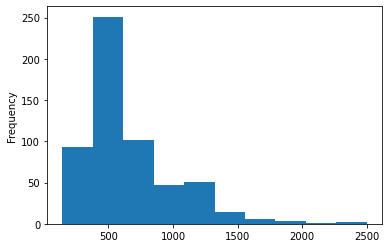

In [ ]:
# plot a hisogram of the attribute
df['mean area'].plot(kind='hist')

# Q2 Distance based model (LOF)
Use the LOF algorithm to determine the outlier factor scores for a synthetic data set.
- Generate the dataset
- initiate a `LocalOutlierFactor` classifier with `n_neighbors=3`
- visualize the LOF scores for each data point
- Plot an ROC for the LOF with 3 neighbors.
- change `n_neighbors` to be between 3 and 10 and replot. Comment on the difference.


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
y = np.ones(shape=X.shape[0], dtype=bool)
# y == True for inliers, False for outliers
y[-len(X_outliers):] = False

In [ ]:
lof = LocalOutlierFactor(n_neighbors=3)

In [ ]:
yhat = lof.fit_predict(X)>0 # True -> inlier, False -> outlier
X_scores = lof.negative_outlier_factor_

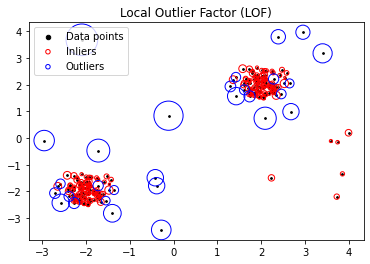

In [ ]:
# From sklearn user guide
fig, ax = plt.subplots(1,1)
ax.set_title("Local Outlier Factor (LOF)")
ax.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
mask = np.where(yhat)
ax.scatter(X[:, 0][mask], X[:, 1][mask], s=1000 * radius[mask], edgecolors='r',
            facecolors='none', label='Inliers')
mask = np.where(~yhat)
ax.scatter(X[:, 0][mask], X[:, 1][mask], s=1000 * radius[mask], edgecolors='b',
            facecolors='none', label='Outliers')
#ax.set_xlabel("prediction errors: %d" % (n_errors))
legend = ax.legend(loc='upper left')
for lh in legend.legendHandles:
  lh._sizes = [20]
plt.show()

In the above, notice the outliers (blue), that are overlapping with the inliers (red).
This would indicate that we are not doing a good job, and should probably increase the `n_neighbours` parameter.

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y,X_scores) # use our known labels, and the outlier scores
roc_auc = auc(fpr, tpr)

In [ ]:
# plot the ROC curve.
def plot_ROC(fpr, tpr, roc_auc):
  lw = 2
  fig, ax = plt.subplots(1,1)
  ax.plot(fpr, tpr, color='darkorange',
          lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
  ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random chance')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('Receiver operating characteristic example')
  ax.legend(loc="lower right")
  plt.show()

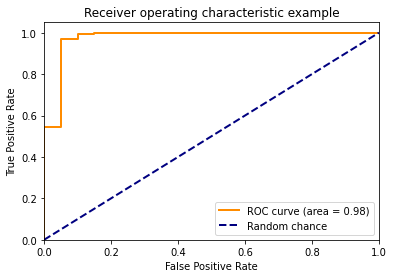

In [ ]:
plot_ROC(fpr, tpr, roc_auc)

Now we see how our ROC curve changes as we modify the value of `n_neighbours`.

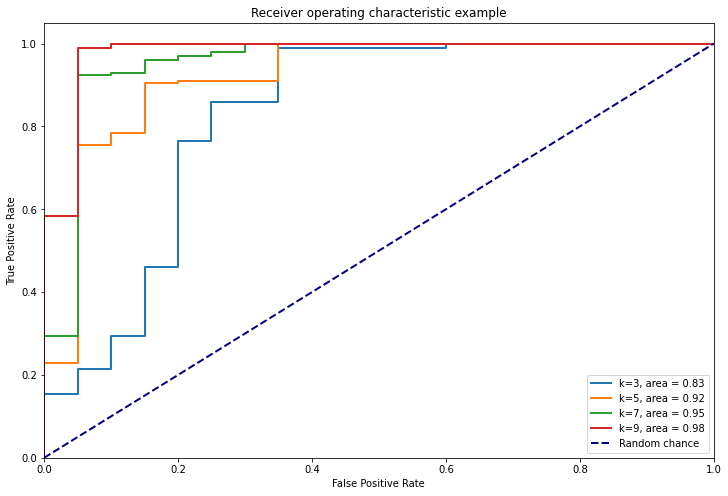

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(12,8))

lw = 2
for k  in range(3,10,2):
  lof = LocalOutlierFactor(n_neighbors=k)
  yhat = lof.fit_predict(X)>0 # True -> inlier, False -> outlier
  X_scores = lof.negative_outlier_factor_
  fpr, tpr, thresholds = roc_curve(y,X_scores)
  roc_auc = auc(fpr, tpr)
  ax.plot(fpr, tpr,
          lw=lw, label=f'k={k}, area = {roc_auc:.2f}')

ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random chance')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")



# Q3 Probabalistic model - Gaussian Mixture

Create a gaussian mixture model with 3 components
- fit the model with the data
- generate outlier scores for each data point
- visualise the model
- plot an ROC for this model

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3)

In [ ]:
y_hat = gmm.fit_predict(X)
X_probs = gmm.score_samples(X)

In [ ]:
# From https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py
from scipy import linalg
import itertools
color_iter = itertools.cycle(['navy', 'darkorange','red'])

def plot_results(X, Y_, means, covariances):
    fig, ax = plt.subplots(1, 1)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

    #ax.set_xlim(-9., 5.)
    #ax.set_ylim(-3., 6.)
    #plt.xticks(())
    #plt.yticks(())
    plt.show()
    return

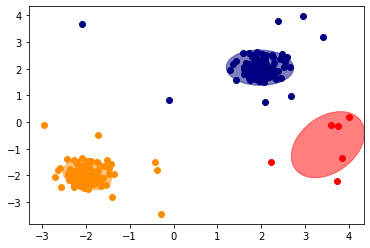

In [ ]:
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_)

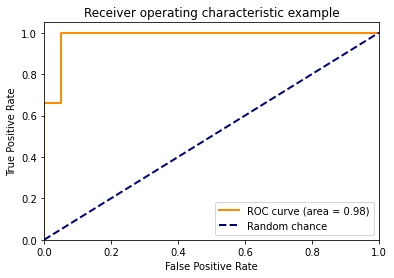

In [ ]:
# compute the fpr, tpr, and threshold values for this model
fpr, tpr, thresholds = roc_curve(y,X_probs)
roc_auc = auc(fpr, tpr)
plot_ROC(fpr, tpr, roc_auc)

# Q4 Density based model
Select the KernelDesnsity estimator:
- use a kernel of 'linear' with a `bandwidth`=0.1
- fit the model
- predict probabilities for X
- compute and plot the ROC
- experiment with other kernels to see which gives a better AUC:
  - tophat
  - gaussian
  - exponential
- adjust the bandwidth parameter and note it's affects on the ROC.  

In [ ]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='linear', bandwidth=0.1)

In [ ]:
kde.fit(X)

KernelDensity(bandwidth=0.1, kernel='linear')

In [ ]:
X_probs = kde.score_samples(X)

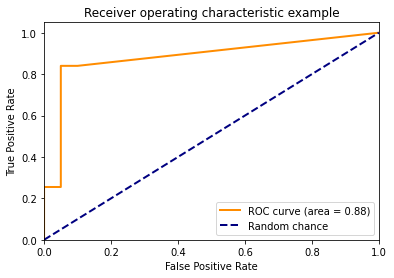

In [ ]:
fpr, tpr, thresholds = roc_curve(y,X_probs)
roc_auc = auc(fpr, tpr)
plot_ROC(fpr, tpr, roc_auc)